In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
terrorism = pd.read_csv("globalterrorismdb_0617dist.csv", encoding='iso-8859-1', sep=',')

/Users/minghanxu/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#print(terrorism.dtypes)
terrorism_mix_data_types = terrorism.iloc[:,[4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121]]

In [4]:
#print(terrorism_mix_data_types.dtypes)
#print(terrorism_mix_data_types.head())
#print(list(pd.isnull(terrorism).sum() > 0))
terrorism.isnull().head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
5,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
7,False,False,False,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
8,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [5]:
print(list(terrorism.columns))

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [69]:
terrorism_latitude_longitude = terrorism[['latitude','longitude']] 

In [70]:
print(terrorism_latitude_longitude.dropna().shape)
print(terrorism_latitude_longitude.shape)
terrorism_latitude_longitude = terrorism_latitude_longitude.dropna()
#terrorism_latitude_longitude = terrorism_latitude_longitude[(np.abs(stats.zscore(terrorism_latitude_longitude)) < 3).all(axis=1)]
print(terrorism_latitude_longitude.shape)

(165744, 2)
(170350, 2)
(165744, 2)


In [71]:
n_clusters = 15
print(terrorism_attacktype_weaptype.head())


NameError: name 'terrorism_attacktype_weaptype' is not defined

In [72]:
dataset_array = terrorism_latitude_longitude.values
print(dataset_array.dtype)
print(dataset_array)
X = dataset_array
print(len(X))

float64
[[  18.456792  -69.951164]
 [  19.432608  -99.133207]
 [  15.478598  120.599741]
 ..., 
 [   4.308611   25.091389]
 [  26.819644 -107.069898]
 [  12.961401   24.044116]]
165744


In [73]:
k_means = KMeans(init='k-means++', n_clusters=8, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [74]:
fig = plt.figure(figsize=(8, 8))
colors = sns.color_palette("hls", 8)
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

In [75]:
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    print(len(my_members))
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans on GTD')
ax.set_xlabel('Latitude in °')
ax.set_ylabel('Longitude in °')
#ax.set_xticks(())
#ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, k_means.inertia_))

165744
165744
165744
165744
165744
165744
165744
165744


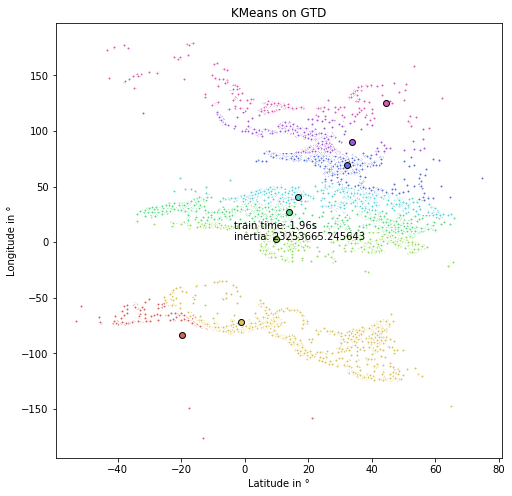

In [76]:
plt.show()

In [ ]:
# SVM Modeling, very slow to run

In [ ]:
terrorism_success = terrorism[['targtype1','weaptype1','success']] 
print(terrorism_success.shape)
terrorism_success = terrorism_success.dropna()
print(terrorism_success.shape)

terrorism_success_sample = terrorism_success.sample(1000)
print(terrorism_success_sample)

X = terrorism_success_sample[['targtype1','weaptype1']] 
y = terrorism_success_sample[['success']]

X = X.values
y = y['success'].values

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

print(X,y)

#print((y).shape)
#print(isinstance(y,(np.ndarray)))
#print(X.dropna().shape)
#print(X.shape)
#pd.isnull(X).sum()

In [ ]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)



In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Country')
    ax.set_ylabel('Weapon Type')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

In [82]:
# PCA
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler

terrorism_useful = terrorism[['iyear','imonth','iday','country','region','latitude','longitude','specificity'
        ,'vicinity','crit1','crit2','crit3','doubtterr','multiple','suicide'
        ,'attacktype1','guncertain1','weaptype1','success','targtype1_txt']]

terrorism_useful = terrorism_useful.dropna()

X = terrorism_useful.iloc[:,0:19].values
y = terrorism_useful.iloc[:,19].astype('category')

labels = y.unique()
print(labels)

y = y.values

#print(X.shape)

X_std = StandardScaler().fit_transform(X)

#print(isinstance(X,(np.ndarray)))
#print(y)


[Private Citizens & Property, Government (Diplomatic), Journalists & Media, Police, Utilities, ..., Food or Water Supply, Terrorists/Non-State Militia, Other, Maritime, Abortion Related]
Length: 22
Categories (22, object): [Private Citizens & Property, Government (Diplomatic), Journalists & Media, Police, ..., Terrorists/Non-State Militia, Other, Maritime, Abortion Related]


In [83]:
sklearn_pca = sklearnPCA(n_components=10)
Y_sklearn = sklearn_pca.fit_transform(X_std)
colors = sns.color_palette("hls", 22)

In [84]:
i = np.identity(X.shape[1])
coef = sklearn_pca.transform(i)
pd.DataFrame(coef,columns=['PC1', 'PC2','PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9', 'PC10'], index=terrorism_useful.iloc[:,0:19].columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
iyear,-0.521380,0.086377,-0.264946,-0.105170,0.017197,0.000167,-0.058097,0.023699,-0.007242,0.007629
imonth,0.008437,0.020094,-0.018484,-0.034088,0.144462,-0.103948,-0.016453,0.318397,0.825422,-0.213902
iday,-0.015433,-0.009618,0.014384,-0.005486,0.094340,-0.093805,0.190888,0.610263,-0.170700,0.653770
country,-0.047810,-0.090983,0.544024,0.330448,-0.117677,0.224425,0.165924,-0.064001,-0.008168,-0.062414
region,-0.471456,0.040174,0.261196,-0.062698,-0.063209,-0.056501,0.021035,-0.059436,0.063890,0.087835
latitude,-0.339305,-0.004038,0.419567,0.050821,0.120874,0.065691,0.056241,-0.080316,-0.016737,0.005413
longitude,-0.514559,0.066514,-0.023188,-0.180786,0.013236,0.074656,-0.117773,0.082365,-0.032255,0.026750
specificity,-0.078485,0.114634,-0.391213,0.098458,0.376491,0.333759,0.002557,0.109868,-0.115264,-0.083780
vicinity,-0.090968,0.004718,-0.033539,0.112641,-0.470848,-0.494176,-0.269358,0.107293,-0.067792,-0.075831
crit1,-0.005937,0.068381,0.031145,0.020385,0.095713,-0.349431,0.658521,0.187860,-0.183218,-0.262559


In [85]:
print(sklearn_pca.components_)
print(sklearn_pca.explained_variance_ratio_)

[[ -5.21379699e-01   8.43725834e-03  -1.54333441e-02  -4.78095579e-02
   -4.71456044e-01  -3.39304875e-01  -5.14558519e-01  -7.84846727e-02
   -9.09681910e-02  -5.93729847e-03   5.61246620e-03   5.69094891e-02
   -2.60431204e-01  -4.43533501e-02  -1.59643672e-01   1.40024249e-02
   -2.71282431e-02   5.58979801e-02   7.95247586e-02]
 [  8.63766401e-02   2.00940146e-02  -9.61838646e-03  -9.09826450e-02
    4.01737993e-02  -4.03833941e-03   6.65140606e-02   1.14633775e-01
    4.71764431e-03   6.83808455e-02   1.38991297e-02   1.13594065e-01
   -1.74819397e-01   1.31202764e-01  -3.90367858e-02   6.72063851e-01
    3.63076078e-02   6.64873356e-01   4.92970074e-02]
 [ -2.64945971e-01  -1.84841222e-02   1.43841199e-02   5.44024021e-01
    2.61196357e-01   4.19567425e-01  -2.31881091e-02  -3.91212736e-01
   -3.35392666e-02   3.11453913e-02  -7.14307608e-02   1.46290119e-01
   -2.94859277e-01  -2.13860881e-01  -8.02135586e-02   3.16621850e-02
   -2.09173995e-01   8.82248547e-02  -1.23275478e-01

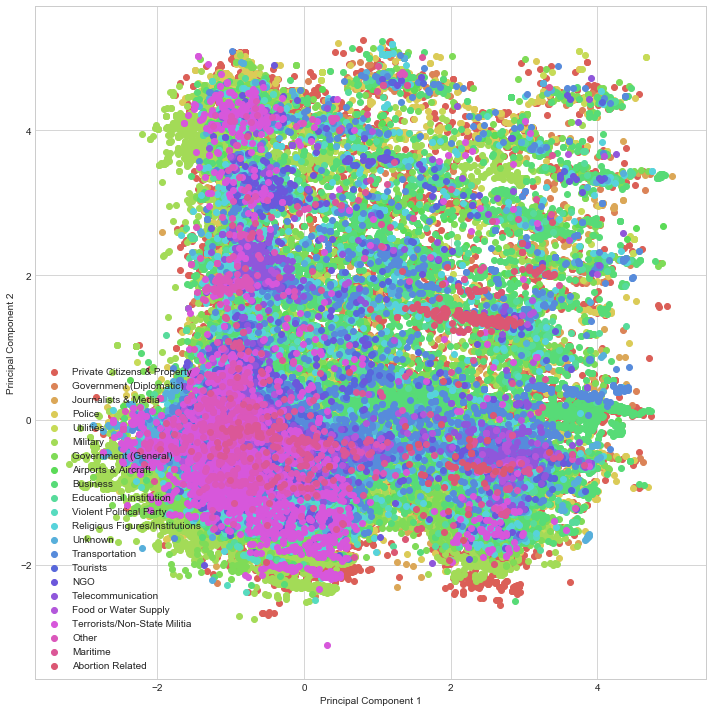

In [90]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    for lab, col in zip(labels,
                        colors):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

In [78]:
a = [ 0.11839105, 0.090282, 0.07131302, 0.06229532, 0.05629365, 0.05532176, 0.0543505, 0.05320678, 0.05260386, 0.05207744]

In [80]:
print(len(a))
print(sum(a))

10
0.6661353799999999


In [81]:
terrorism_useful.corr()

,iyear,imonth,iday,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,suicide,attacktype1,guncertain1,weaptype1,success
iyear,1.000000,0.002555,0.014477,-0.144034,0.398026,0.171263,0.553290,0.131128,0.072963,0.001460,0.027972,-0.013552,0.297053,0.095585,0.134949,0.063169,0.050787,-0.021084,-0.066400
imonth,0.002555,1.000000,0.003417,-0.007372,-0.001234,-0.015696,-0.004097,0.004263,-0.006177,0.001864,0.001177,-0.000416,-0.013602,-0.002181,0.004985,0.009039,-0.004847,0.008350,-0.002623
iday,0.014477,0.003417,1.000000,0.004217,0.008391,0.003118,0.010949,-0.005001,-0.005249,0.012176,-0.001890,-0.005156,0.000811,-0.005496,0.003377,-0.006928,-0.001987,-0.003549,-0.008300
country,-0.144034,-0.007372,0.004217,1.000000,0.149730,0.196744,-0.007005,-0.088225,-0.013238,-0.005859,-0.039176,-0.044469,0.041670,-0.021374,-0.051305,-0.022647,-0.013577,-0.022718,-0.043278
region,0.398026,-0.001234,0.008391,0.149730,1.000000,0.323802,0.428882,-0.056471,0.070914,0.023070,-0.012380,-0.009215,0.085654,0.015042,0.108302,0.000426,-0.021367,0.008156,-0.021447
latitude,0.171263,-0.015696,0.003118,0.196744,0.323802,1.000000,0.273602,-0.020359,0.006085,0.020175,-0.003920,-0.003482,0.068462,-0.026362,0.069511,0.007863,-0.063626,-0.016081,-0.069158
longitude,0.553290,-0.004097,0.010949,-0.007005,0.428882,0.273602,1.000000,0.108120,0.059264,-0.005171,-0.006922,0.023924,0.117315,-0.007335,0.069746,0.009345,0.045924,-0.020109,-0.042805
specificity,0.131128,0.004263,-0.005001,-0.088225,-0.056471,-0.020359,0.108120,1.000000,-0.044621,0.013663,0.000876,-0.055015,0.064432,0.049858,-0.018070,0.054810,0.005529,0.044941,0.002559
vicinity,0.072963,-0.006177,-0.005249,-0.013238,0.070914,0.006085,0.059264,-0.044621,1.000000,0.004009,-0.000483,-0.052615,0.035174,-0.010292,0.008609,0.007562,0.032116,0.002443,-0.000759
crit1,0.001460,0.001864,0.012176,-0.005859,0.023070,0.020175,-0.005171,0.013663,0.004009,1.000000,-0.009139,-0.039545,-0.059762,0.029676,0.018752,0.026088,0.018288,0.029352,-0.009159


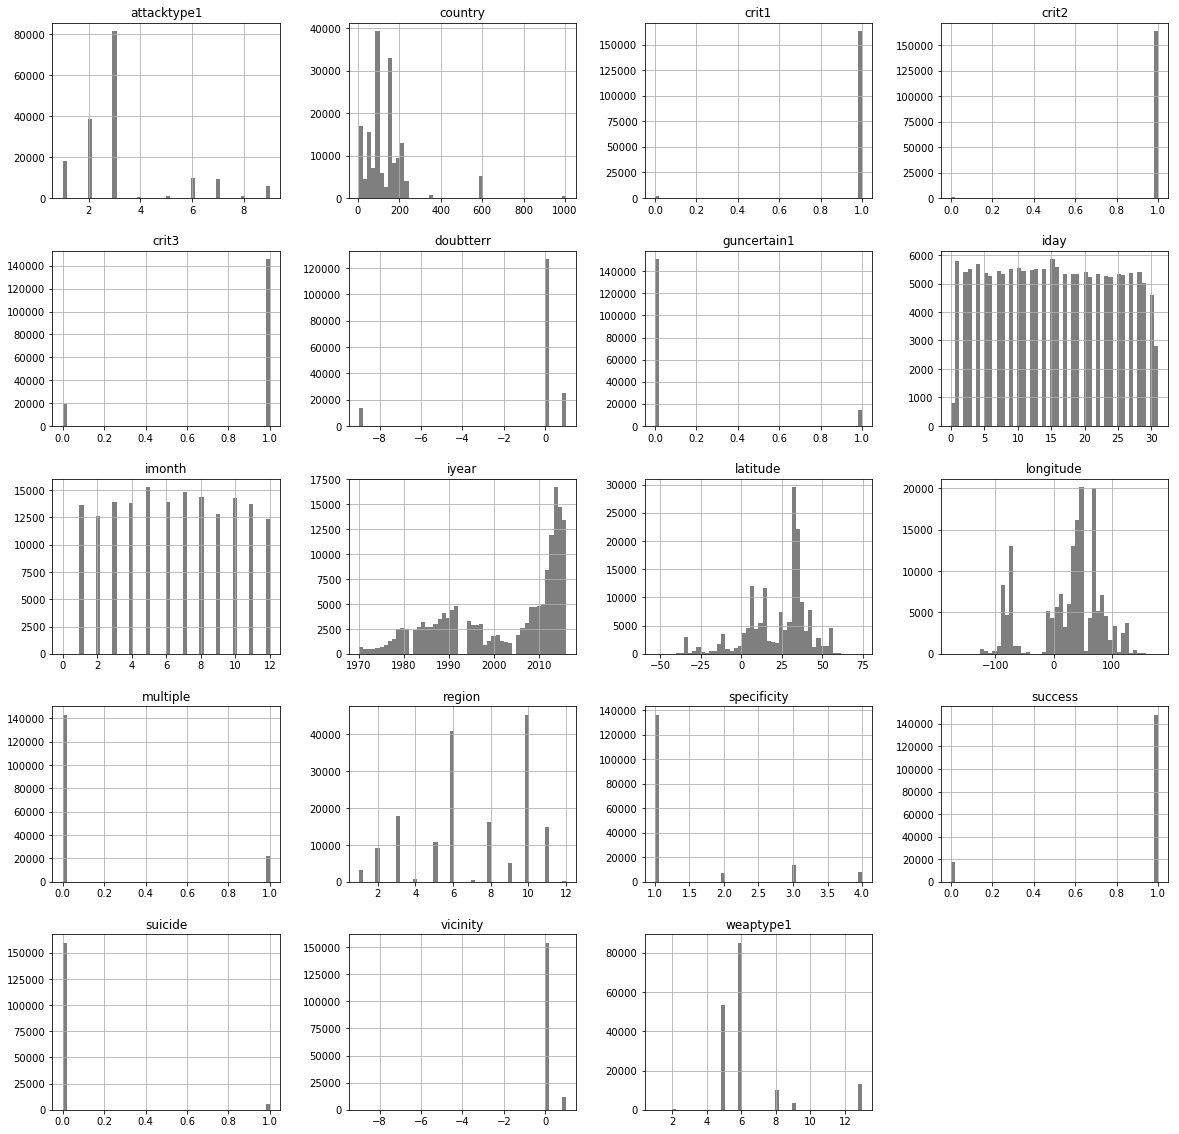

In [113]:
terrorism_useful.dtypes
Z = terrorism_useful.iloc[:,0:19]
#plt.figure
Z.hist(color='k', alpha=0.5, bins=50, figsize=(20,20))
plt.show()

In [112]:
Z.describe()

,iyear,imonth,iday,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,suicide,attacktype1,guncertain1,weaptype1,success
count,165374.000000,165374.000000,165374.000000,165374.000000,165374.000000,165374.000000,165374.000000,165374.000000,165374.00000,165374.000000,165374.000000,165374.000000,165374.000000,165374.000000,165374.000000,165374.000000,165374.000000,165374.000000,165374.000000
mean,2001.985064,6.476048,15.481811,133.264298,7.120841,23.371063,26.395956,1.356314,0.06807,0.988336,0.992974,0.882999,-0.567641,0.134743,0.034703,3.215772,0.085412,6.413112,0.894820
std,13.122898,3.393077,8.813548,113.623549,2.927186,18.855577,58.624661,0.829839,0.28530,0.107371,0.083529,0.321423,2.513316,0.341450,0.183027,1.880787,0.279495,2.121877,0.306786
min,1970.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,-9.00000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1990.000000,4.000000,8.000000,78.000000,5.000000,11.217469,2.365182,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000,1.000000
50%,2008.000000,6.000000,15.000000,98.000000,6.000000,31.417539,43.130000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,6.000000,1.000000
75%,2014.000000,9.000000,23.000000,160.000000,10.000000,34.706377,68.524715,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,6.000000,1.000000
max,2016.000000,12.000000,31.000000,1004.000000,12.000000,74.633553,179.366667,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,13.000000,1.000000
